In [53]:
pip install pmdarima

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [56]:
df=pd.read_csv("/content/minimum_temperature.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [57]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

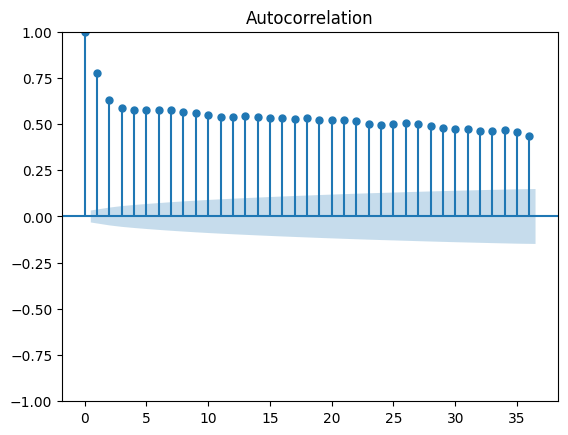

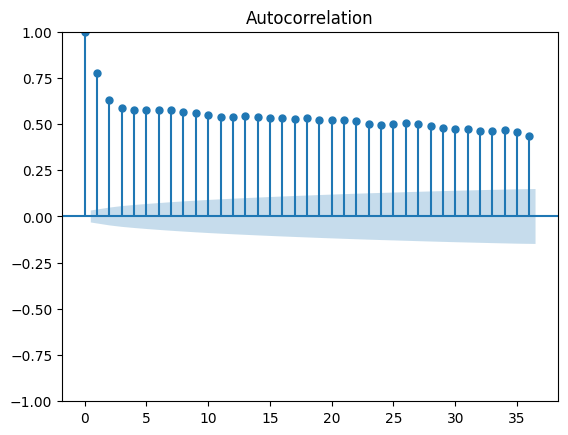

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Temp'])

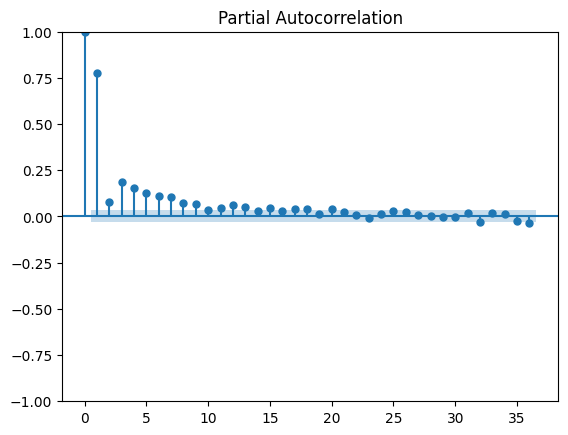

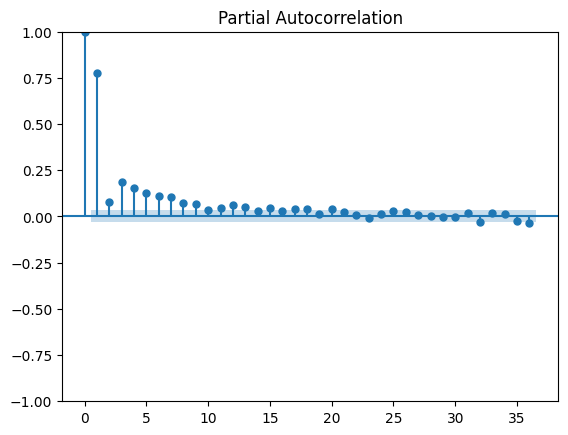

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Temp'])

In [60]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df['Temp'],trace=True,
                        suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16781.136, Time=8.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20611.139, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17265.725, Time=0.89 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18554.160, Time=1.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28436.596, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=16816.370, Time=6.79 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16831.033, Time=10.60 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16780.218, Time=15.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16777.600, Time=8.51 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17113.438, Time=1.58 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=16779.598, Time=7.64 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17245.958, Time=1.22 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=17030.851, Time=3.91 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=16781.448, Time=5.77 sec
 ARIMA(3,0,1)(0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3650
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -8382.800
Date:                Sun, 10 Dec 2023   AIC                          16777.600
Time:                        11:00:29   BIC                          16814.815
Sample:                             0   HQIC                         16790.853
                               - 3650                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0562      0.018      3.127      0.002       0.021       0.091
ar.L1          1.4851      0.018     80.343      0.000       1.449       1.521
ar.L2         -0.6204      0.027    -23.367      0.000      -0.672      -0.568
ar.L3          0.1303      0.018      7.385      0.000       0.096       0.165
ma.L1         -0.8928      0.012    -76.066      0.000      -0.916      -0.870
sigma2         5.7832      0.128     45.331      0.000       5.533       6.033
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                16.70
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]
model = ARIMA(train_data['Temp'], order=(3,0,1))
fitted_model = model.fit()

start = len(train_data)
end = start + len(test_data) - 1
predictions = fitted_model.predict(start=start, end=end, typ='levels')


Mean Squared Error (MSE): 16.152373633595985


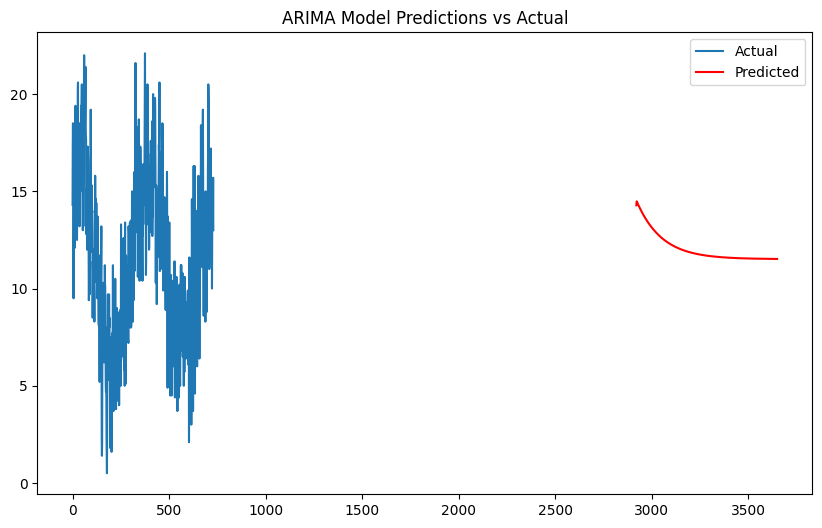

In [62]:
mse = mean_squared_error(test_data['Temp'], predictions)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(test_data['Temp'].values, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.title('ARIMA Model Predictions vs Actual')
plt.show()


In [64]:
rmse = np.sqrt(mean_squared_error(test_data['Temp'], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

#error of 4 degrees

Root Mean Squared Error (RMSE): 4.0190015717334555


Sunspots dataset

In [65]:
sf=pd.read_csv("/content/sunspots.csv")
sf.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [66]:
sf['Month']=pd.to_datetime(sf['Month'])
sf.set_index('Month',inplace=True)

In [67]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(sf['Sunspots'],trace=True,
                        suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23502.990, Time=4.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24040.854, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23775.434, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23616.338, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24038.855, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23575.114, Time=1.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23573.817, Time=2.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23501.956, Time=13.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23572.876, Time=3.99 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=23501.541, Time=8.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=23574.802, Time=2.15 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=23577.848, Time=7.87 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.94 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=23578.458, Time=5.56 sec
 ARIMA(5,1,1)(0,0,0)[0] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2820
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -11742.771
Date:                Sun, 10 Dec 2023   AIC                          23499.543
Time:                        11:05:29   BIC                          23541.152
Sample:                    01-01-1749   HQIC                         23514.557
                         - 12-01-1983                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3789      0.025     55.909      0.000       1.331       1.427
ar.L2         -0.3888      0.027    -14.547      0.000      -0.441      -0.336
ar.L3         -0.0054      0.025     -0.217      0.828      -0.054       0.043
ar.L4         -0.0347      0.017     -2.016      0.044      -0.068      -0.001
ma.L1         -1.8147      0.020    -92.846      0.000      -1.853      -1.776
ma.L2          0.8530      0.020     43.010      0.000       0.814       0.892
sigma2       242.9899      4.118     59.001      0.000     234.918     251.062
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1158.42
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mean Squared Error (MSE): 6068.979621617337


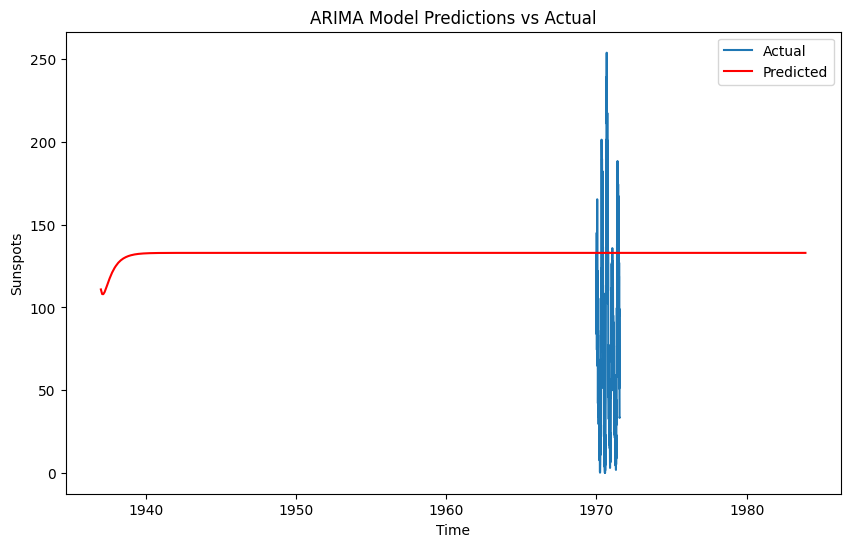

In [68]:
train_size = int(len(sf) * 0.8)
train_data, test_data = sf.iloc[:train_size], sf.iloc[train_size:]

model = ARIMA(train_data['Sunspots'], order=(4,1,2))
fitted_model = model.fit()

start = len(train_data)
end = start + len(test_data) - 1
predictions = fitted_model.predict(start=start, end=end, typ='levels')

mse = mean_squared_error(test_data['Sunspots'], predictions)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(test_data['Sunspots'].values, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.title('ARIMA Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Sunspots')
plt.show()


In [69]:
rmse = np.sqrt(mean_squared_error(test_data['Sunspots'], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 77.90365602214916
